In [13]:
import os
import random

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ultralytics import YOLO

In [15]:
# Directories
BASE_DIR = os.getcwd()
ROOT = os.path.dirname(BASE_DIR)
TEST_DATA_PATH = os.path.join(ROOT, 'data', 'images', 'test')
RESULTS_PATH = os.path.join(ROOT, 'models', 'yolo_sku110k_model')


image 1/1 E:\Work\GTC\Projects\GTC-Retail-Shelf-Monitoring\data\images\test\test_62.jpg: 416x256 166 objects, 22.9ms
Speed: 5.2ms preprocess, 22.9ms inference, 545.9ms postprocess per image at shape (1, 3, 416, 256)


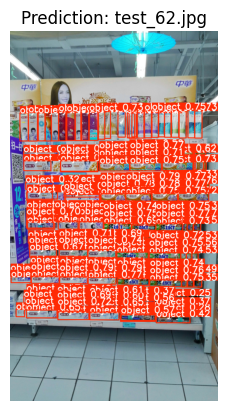

In [28]:
# Show the prediction of a random test img
random_img = random.randint(0, 2940)  # len of the test imgs
img_path = os.path.join(TEST_DATA_PATH, f'test_{random_img}.jpg')

model = YOLO(os.path.join(RESULTS_PATH, 'weights', 'best.pt'))

results = model.predict(img_path, conf=0.25)

plt.imshow(results[0].plot())
plt.axis("off")
plt.title(f"Prediction: {os.path.basename(img_path)}")
plt.show()

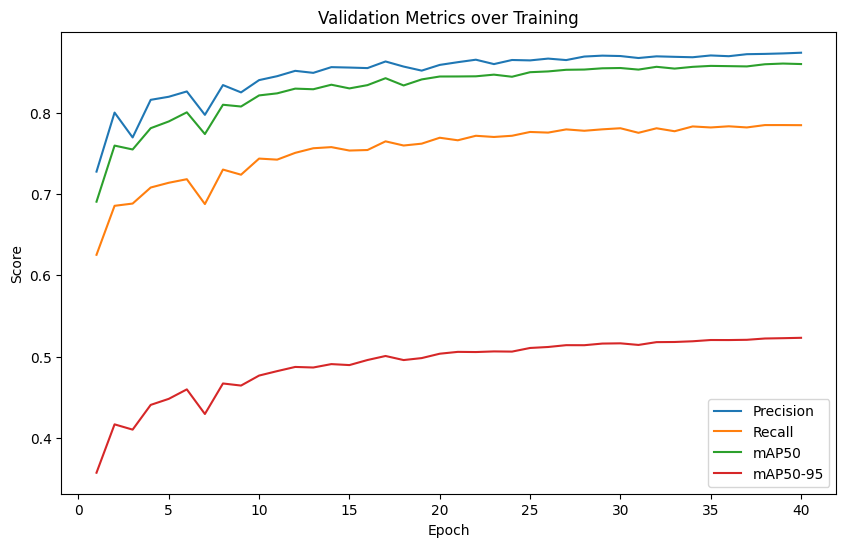

In [29]:
# Validation Metrics 
df = pd.read_csv(os.path.join(RESULTS_PATH, 'results.csv'))

plt.figure(figsize=(10,6))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Validation Metrics over Training")
plt.legend()
plt.show()

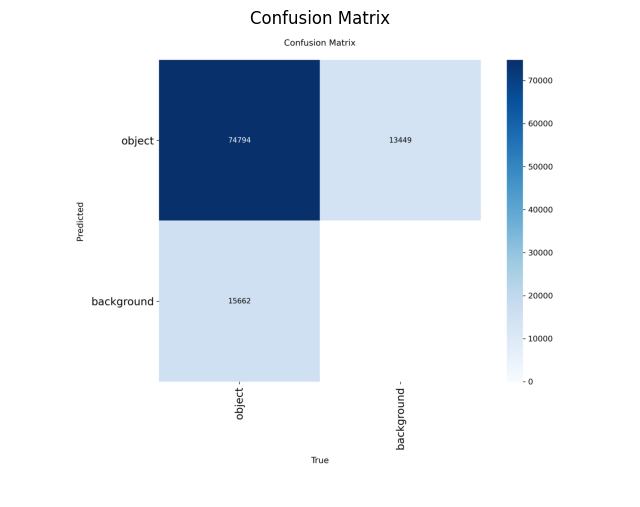

In [30]:
# Confusion Matrix
img = mpimg.imread(os.path.join(RESULTS_PATH, 'confusion_matrix.png'))

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")  
plt.title("Confusion Matrix")
plt.show()